<a href="https://colab.research.google.com/github/enakai00/colab_rlbook/blob/master/Chapter04/01_Monty_Hall_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pandas import DataFrame
matplotlib.rcParams['font.size'] = 12

In [0]:
class MontyHall:
  def __init__(self, doors=3, hints=1):
    self.doors = doors
    self.hints = hints

  def play(self, change):
    prize = np.random.randint(self.doors)
    choice = 0
    selectable = [True] * self.doors
    selectable[choice] = False
    selectable[prize] = False

    # Open some unselected doors
    selectable_to_open = [n for n in range(self.doors) if selectable[n]]
    for c in np.random.choice(selectable_to_open, self.hints, replace=False):
      selectable[c] = False

    if change:  # Change the choice
      if choice != prize:
        selectable[prize] = True
      selectable_to_choose = [c for c in range(self.doors) if selectable[c]]
      choice = np.random.choice(selectable_to_choose, 1, replace=False)[0]

    if choice == prize:
      return 1    # Win
    else:
      return 0    # Lose

In [0]:
def trials(monty_hall, change, num=10000):
  results = []
  for _ in range(num):
    results.append(monty_hall.play(change=change))
  return sum(results) / num

In [0]:
monty_hall = MontyHall(doors=3, hints=1)

In [5]:
trials(monty_hall, change=False)

0.3324

In [6]:
trials(monty_hall, change=True)

0.6629

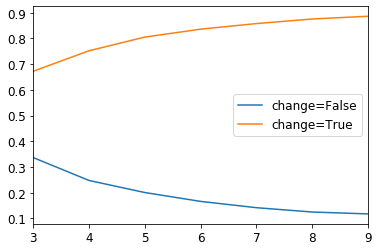

In [7]:
doors_range = range(3, 10)
results1, results2 = [], []
for doors in doors_range:
  monty_hall = MontyHall(doors=doors, hints=doors-2)
  results1.append(trials(monty_hall, change=False))
  results2.append(trials(monty_hall, change=True))

ax = DataFrame({'change=False': results1,
                'change=True': results2}).plot()
_ = ax.set_xticklabels(doors_range)